In [1]:
import pandas as pd
import dateparser
import datetime as datetime
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
from textblob import TextBlob
from bs4 import BeautifulSoup

In [3]:
#REDDIT THREADS
df_reddit1 = pd.read_csv('df_reddit1.csv')
df_reddit2 = pd.read_csv('df_reddit2.csv')
df_reddit3 = pd.read_csv('df_reddit3.csv')
df_reddit4 = pd.read_csv('df_reddit4.csv')
df_reddit5 = pd.read_csv('df_reddit5.csv')



In [24]:
df_reddit = pd.concat([df_reddit1, df_reddit2, df_reddit3, df_reddit4, df_reddit5], ignore_index=True)

In [4]:
#REDDIT COMMENTS
df_reddit_comments1 = pd.read_csv('erpc1.csv')
df_reddit_comments2 = pd.read_csv('erpc2.csv')
df_reddit_comments3 = pd.read_csv('erpc3.csv')
df_reddit_comments4 = pd.read_csv('erpc4.csv')
df_reddit_comments5 = pd.read_csv('erpc5.csv')
df_reddit_comments6 = pd.read_csv('erpc6.csv')


In [65]:
df_reddit_comments = pd.concat([df_reddit_comments2, df_reddit_comments3, df_reddit_comments5, df_reddit_comments6], ignore_index=True)

In [5]:
df_reddit_comments = pd.concat([df_reddit_comments1, df_reddit_comments2, df_reddit_comments3, df_reddit_comments4, df_reddit_comments5, df_reddit_comments6], ignore_index=True)

In [4]:
#REDDIT COMMENTS
df_reddit_opening_post1 = pd.read_csv('erpi1.csv')
#df_reddit_opening_post2 = pd.read_csv('erpi2.csv')
df_reddit_opening_post3 = pd.read_csv('erpi3.csv')
df_reddit_opening_post4 = pd.read_csv('erpi4.csv')
#df_reddit_opening_post5 = pd.read_csv('erpi5.csv')

In [5]:
reddit_opening_posts = pd.concat([df_reddit_opening_post1, df_reddit_opening_post3, df_reddit_opening_post4], ignore_index=True)

In [ ]:
reddit_opening_posts = pd.concat([df_reddit_opening_post1, df_reddit_opening_post2, df_reddit_opening_post3, df_reddit_opening_post4, df_reddit_opening_post5], ignore_index=True)

In [29]:
def clean_reddit_threads(df):
    # Initialize SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()
    
    # Remove duplicates and rows with 'Error loading' in the 'Link' column
    df.drop_duplicates(inplace=True)
    df = df[df['Link'] != 'Error loading'].reset_index(drop=True)

    # Calculate Title sentiment and Title subjectivity
    df['Title sentiment'] = df['Title'].apply(lambda x: sia.polarity_scores(x)['compound'])
    df['Title subjectivity'] = df['Title'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
    
    return df


In [30]:
df_reddit_threads = clean_reddit_threads(df_reddit)

In [31]:
df_reddit_threads.to_csv('./cleaned/df_reddit_threads', index=False)

In [6]:
def clean_reddit_comments(df):
    sia = SentimentIntensityAnalyzer()
    df['date'] = df['date'].apply(lambda x: dateparser.parse(x).strftime('%d-%m-%Y'))
    df = df[df['Name'] != 'AutoModerator']
    df['comment2'] = df['comment2'].astype(str)
    df['Comment sentiment'] = df['comment2'].apply(lambda x: sia.polarity_scores(x)['compound'])
    df['Comment subjectivity'] = df['comment2'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
    df.loc[df['upvotes'] == 'Vote', 'upvotes'] = '0'
    df['upvotes'] = df['upvotes'].str.replace('k', '000')
    df['upvotes'] = df['upvotes'].str.replace('.', '')
    
    df = df.rename(columns={'Name': 'Username', 
                            'upvotes': 'Upvotes', 
                            'date': 'Date', 
                            'description': 'Description', 
                            'url': 'Link',
                            'comment2': 'Comment'})

    # Reorder columns
    df = df.reindex(columns=['Username','Date','Comment','Comment sentiment','Comment subjectivity','Upvotes','Link'])
    return df

In [7]:
cleaned_comments = clean_reddit_comments(df_reddit_comments)

C:\Users\Tim_K\AppData\Local\Temp\ipykernel_10512\3714250130.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment2'] = df['comment2'].astype(str)
C:\Users\Tim_K\AppData\Local\Temp\ipykernel_10512\3714250130.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Comment sentiment'] = df['comment2'].apply(lambda x: sia.polarity_scores(x)['compound'])
C:\Users\Tim_K\AppData\Local\Temp\ipykernel_10512\3714250130.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [8]:
cleaned_comments

,Username,Date,Comment,Comment sentiment,Comment subjectivity,Upvotes,Link
0,FuturologyBot,17-02-2023,The following submission statement was provide...,0.0000,0.1000,0,https://www.reddit.com/r/Futurology/comments/1...
1,CaptPants,17-02-2023,I hope it's used for more than just cutting jo...,0.6170,0.7000,47000,https://www.reddit.com/r/Futurology/comments/1...
2,Shanhaevel,17-02-2023,"Haha, that's rich. As if.",0.7650,0.5250,20000,https://www.reddit.com/r/Futurology/comments/1...
3,SatiricalComment,17-02-2023,One of the intents of many scientists who deve...,0.1280,0.3125,11000,https://www.reddit.com/r/Futurology/comments/1...
4,fistfulloframen,17-02-2023,You can use it to fix up your resume after you...,0.0000,0.0000,30,https://www.reddit.com/r/Futurology/comments/1...
...,...,...,...,...,...,...,...
85201,GeniusEE,06-03-2023,With the poetry ChatGPT generates? Absolutely!,0.0000,0.9000,1,https://www.reddit.com/r/unusual_whales/commen...
85202,Diamondhandatis,07-03-2023,He’s more afraid of the peoples that will be b...,0.0000,0.7000,1,https://www.reddit.com/r/unusual_whales/commen...
85203,MyGruffaloCrumble,07-03-2023,"If you listen to him talk, his argument is mor...",-0.5423,0.7500,1,https://www.reddit.com/r/unusual_whales/commen...
85204,AlphaDag13,07-03-2023,Elon musk also says dogs cant look up.,0.0000,0.0000,1,https://www.reddit.com/r/unusual_whales/commen...


In [10]:
cleaned_comments.to_csv('./cleaned/df_reddit_comments.csv', index=False)

In [19]:
def clean_reddit_opening_post(df):
    sia = SentimentIntensityAnalyzer()
    df['Date'] = df['Date'].apply(lambda x: dateparser.parse(x).strftime('%d-%m-%Y'))
    df['Message'] = df['Message'].astype(str)
    df.loc[df['Upvotes'] == 'Vote', 'Upvotes'] = '0'
    df['Title'] = df['Title'].apply(lambda x: BeautifulSoup(x, 'html.parser').text)
    df['Comments'] = df['Comments'].str.replace('comments', '') 
    df['Comments'] = df['Comments'].str.replace('comment', '') 
    df['Upvotes'] = df['Upvotes'].str.replace('k', '000')
    df['Upvotes'] = df['Upvotes'].str.replace('.', '')
    df['Comments'] = df['Comments'].str.replace('k', '000')
    df['Comments'] = df['Comments'].str.replace('.', '')
    df['Message'] = df['Message'].str.replace('nan', '')
    df['Post sentiment'] = df['Message'].apply(lambda x: sia.polarity_scores(x)['compound'])
    df['Post subjectivity'] = df['Message'  ].apply(lambda x: TextBlob(x).sentiment.subjectivity)

    df = df.rename(columns={'Message': 'Post', 
                            'URL': 'Link'})

    # Reorder columns
    df = df.reindex(columns=['Username','Title','Date', 'Post', 'Post sentiment','Post subjectivity','Upvotes', 'Comments','Link'])
    return df

In [20]:
cleaned_reddit_opening_posts = clean_reddit_opening_post(reddit_opening_posts)

c:\Users\Tim_K\miniconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\Tim_K\AppData\Local\Temp\ipykernel_3172\873407355.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Upvotes'] = df['Upvotes'].str.replace('.', '')
C:\Users\Tim_K\AppData\Local\Temp\ipykernel_3172\873407355.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Comments'] = df['Comments'].str.replace('.', '')


In [21]:
cleaned_reddit_opening_posts

,Username,Title,Date,Post,Post sentiment,Post subjectivity,Upvotes,Comments,Link
0,Gari_305,ChatGPT is just the beginning: Artificial inte...,16-02-2023,,0.0000,0.000000,149000,21000,https://www.reddit.com/r/Futurology/comments/1...
1,Hodlthehodl1,We need to discuss Artificial Intelligence. As...,16-01-2023,"To be clear, I'm not talking about the skynet ...",-0.9218,0.354042,914,465,https://www.reddit.com/r/conspiracy/comments/1...
2,nsw,"I'm Professor Toby Walsh, a leading artificial...",16-02-2023,"Hi Reddit, Prof Toby Walsh here, keen to chat ...",0.9828,0.480093,49000,12000,https://www.reddit.com/r/IAmA/comments/10pi1d4...
3,Gari_305,US experts warn AI likely to kill off jobs – a...,16-02-2023,,0.0000,0.000000,25000,557,https://www.reddit.com/r/Futurology/comments/1...
4,WhiteyKC,Jobs With the Lowest Risk of Automation by Art...,27-02-2023,,0.0000,0.000000,422,351,https://www.reddit.com/r/Futurology/comments/1...
...,...,...,...,...,...,...,...,...,...
537,TheGoombler,A REFRESHER ON THE STATE OF FUD. GUESS WHO IS ...,16-03-2022,TLDR: This is a set of tactics used by the Alp...,-0.9992,0.506461,38000,214,https://www.reddit.com/r/Superstonk/comments/s...
538,MichaelTen,World's First 'Living Machine' Created Using F...,16-03-2020,,0.0000,0.000000,38000,330,https://www.reddit.com/r/technews/comments/eoy...
539,Big__Boss___,Just put in my two weeks,16-04-2022,I've worked at Amazon for 2.5 years making del...,0.9428,0.530694,38000,225,https://www.reddit.com/r/antiwork/comments/udu...
540,odo1987,Apeirophobia,16-03-2019,"I was born in 2089, one of the first children ...",-0.8820,0.485146,37000,150,https://www.reddit.com/r/shortscarystories/com...


In [22]:
cleaned_reddit_opening_posts.to_csv('./cleaned/df_reddit_opening_posts.csv', index=False)

In [16]:
cleaned_reddit_opening_posts = cleaned_reddit_opening_posts[cleaned_reddit_opening_posts['Post'] != '']

In [17]:
cleaned_reddit_opening_posts

,Username,Title,Date,Post,Post sentiment,Post subjectivity,Upvotes,Comments,Link
1,Hodlthehodl1,We need to discuss Artificial Intelligence. As...,16-01-2023,"To be clear, I'm not talking about the skynet ...",-0.9218,0.354042,914,465,https://www.reddit.com/r/conspiracy/comments/1...
2,nsw,"I'm Professor Toby Walsh, a leading artificial...",16-02-2023,"Hi Reddit, Prof Toby Walsh here, keen to chat ...",0.9828,0.480093,49000,12000,https://www.reddit.com/r/IAmA/comments/10pi1d4...
28,Smackgod5150,What if WE are the Artificial Intelligence,03-09-2023,What if we already are the Artificial Intellig...,-0.4012,0.700000,87,45,https://www.reddit.com/r/Existentialism/commen...
30,LeMonde_en,I'm the head of video at France’s leading news...,16-02-2023,EDIT: Hi guys! Thanks for your interesting que...,0.9743,0.378261,21000,88,https://www.reddit.com/r/history/comments/10sm...
47,Esperling30,CMV: Forcing artificial intelligence to pay or...,03-05-2023,I realized at the center of ai art controversy...,0.9786,0.557103,11,119,https://www.reddit.com/r/changemyview/comments...
...,...,...,...,...,...,...,...,...,...
536,Zskills,[WP] An Artificial Intelligence has discovered...,16-03-2018,I haven't been able to get this story plot out...,0.9612,0.675000,38000,114,https://www.reddit.com/r/WritingPrompts/commen...
537,TheGoombler,A REFRESHER ON THE STATE OF FUD. GUESS WHO IS ...,16-03-2022,TLDR: This is a set of tactics used by the Alp...,-0.9992,0.506461,38000,214,https://www.reddit.com/r/Superstonk/comments/s...
539,Big__Boss___,Just put in my two weeks,16-04-2022,I've worked at Amazon for 2.5 years making del...,0.9428,0.530694,38000,225,https://www.reddit.com/r/antiwork/comments/udu...
540,odo1987,Apeirophobia,16-03-2019,"I was born in 2089, one of the first children ...",-0.8820,0.485146,37000,150,https://www.reddit.com/r/shortscarystories/com...


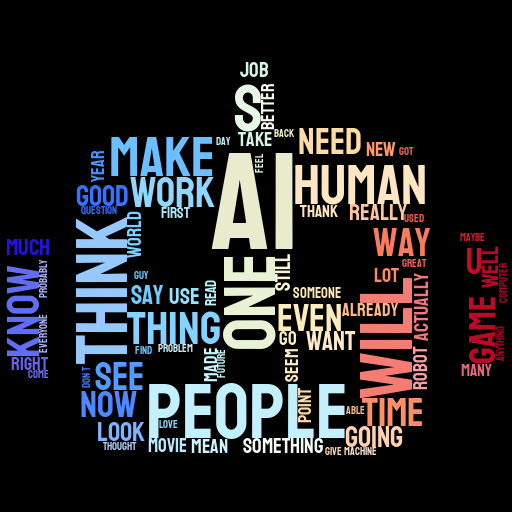

In [2]:
import pandas as pd

df_comments = pd.read_csv("./cleaned/df_reddit_comments.csv")

import stylecloud
from IPython.display import Image
stylecloud.gen_stylecloud(text=df_comments["Comment"].str.cat(sep=' '),
                          icon_name='fas fa-robot',
                          max_words = 75,
                          palette='lightbartlein.diverging.BlueDarkRed18_8',
                          background_color='black',
                          gradient='horizontal')
Image(filename='stylecloud.png')    